## SEICHE vs DWT ANALYSIS 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import gridspec
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
os.chdir (r'C:\Users\lcag075\Dropbox\MAJURO-teslakit')
data_path=r'C:\Users\lcag075\Dropbox\MAJURO-teslakit\teslakit\DATA\sites\MAJURO'

data=xr.open_dataset(os.path.join(data_path,'Seiche','hm0_daily_60secfrequency.nc'))
data['time']=data.time.dt.floor('d')

kma = xr.open_dataset(os.path.join(r'C:\Users\lcag075\Dropbox\Culebras-uoa\MAJURO\DATA\DWTs', "kma.nc"))
kma = xr.Dataset(
        {   'bmus':(('time'),kma.sorted_bmus.values),
         },coords = {'time': kma.time.values})
kma=kma.sel(time = slice(data.time[0],data.time[-1]))

data['bmus']=kma.bmus

In [3]:
num_clusters=36
l_colors_dwt = np.array([ (1.0000, 0.1344, 0.0021), (1.0000, 0.2669, 0.0022), (1.0000, 0.5317, 0.0024), (1.0000, 0.6641, 0.0025), (1.0000, 0.9287, 0.0028),
    (0.9430, 1.0000, 0.0029),(0.6785, 1.0000, 0.0031), (0.5463, 1.0000, 0.0032),(0.2821, 1.0000, 0.0035),(0.1500, 1.0000, 0.0036),(0.0038, 1.0000, 0.1217),
    (0.0039, 1.0000, 0.2539),(0.0039, 1.0000, 0.4901),(0.0039, 1.0000, 0.6082),(0.0039, 1.0000, 0.8444), (0.0039, 1.0000, 0.9625), (0.0039, 0.8052, 1.0000),
    (0.0039, 0.6872, 1.0000),(0.0040, 0.4510, 1.0000),(0.0040, 0.3329, 1.0000),(0.0040, 0.0967, 1.0000),(0.1474, 0.0040, 1.0000),(0.2655, 0.0040, 1.0000),
    (0.5017, 0.0040, 1.0000),(0.6198, 0.0040, 1.0000),(0.7965, 0.0040, 1.0000),(0.8848, 0.0040, 1.0000),(1.0000, 0.0040, 0.9424),(1.0000, 0.0040, 0.8541),
    (1.0000, 0.0040, 0.6774),(1.0000, 0.0040, 0.5890),(1.0000, 0.0040, 0.4124),(1.0000, 0.0040, 0.3240),(1.0000, 0.0040, 0.1473),(0.9190, 0.1564, 0.2476),
    (0.7529, 0.3782, 0.4051),(0.6699, 0.4477, 0.4584),(0.5200, 0.5200, 0.5200),(0.4595, 0.4595, 0.4595),(0.4100, 0.4100, 0.4100),(0.3706, 0.3706, 0.3706),
    (0.2000, 0.2000, 0.2000),(     0, 0, 0)])

# get first N colors 
np_colors_base = np.array(l_colors_dwt)
np_colors_rgb = np_colors_base[:num_clusters]

newcmp = ListedColormap(np_colors_rgb)

C:\Users\lcag075\AppData\Local\Continuum\anaconda2\envs\teslakit\lib\site-packages\ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


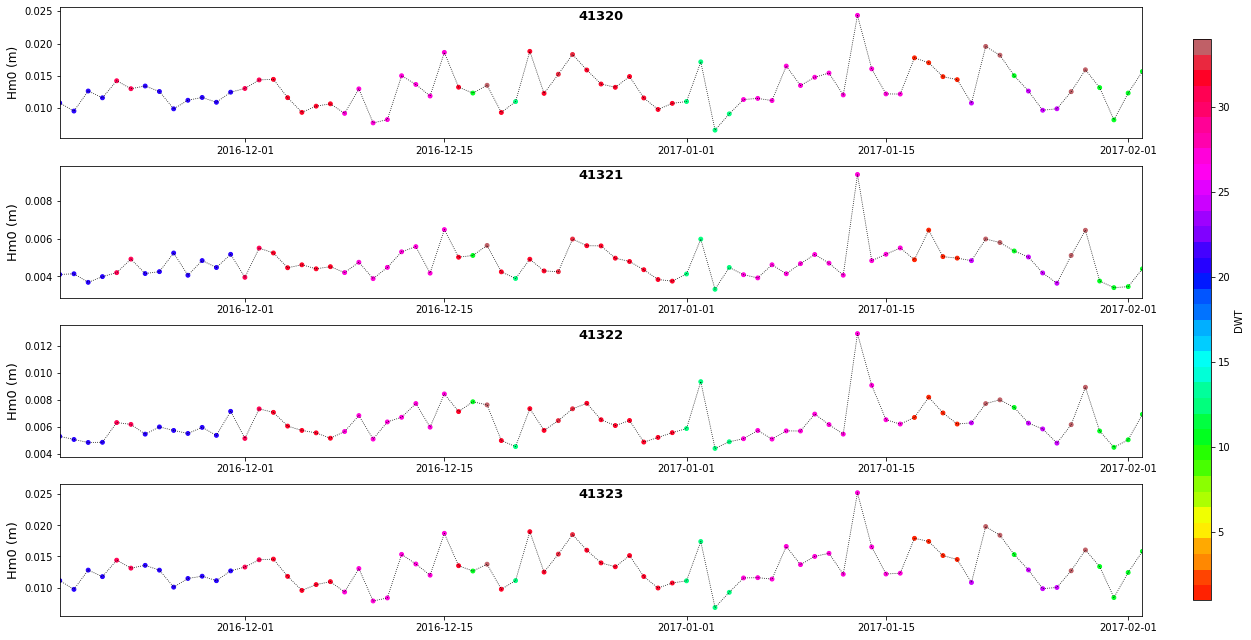

In [4]:
fig = plt.figure(figsize=[18.5,9])
gs1=gridspec.GridSpec(4,1)
ax1=fig.add_subplot(gs1[0])
ax2=fig.add_subplot(gs1[1],sharex=ax1)
ax3=fig.add_subplot(gs1[2],sharex=ax1)
ax4=fig.add_subplot(gs1[3],sharex=ax1)

ax1.plot(data.time,data.hm0_41320,'k:',linewidth=0.8)
ax1.scatter(data.time,data.hm0_41320,15,data.bmus+1,cmap=newcmp)
ax1.set_ylabel('Hm0 (m)',fontsize=12)
ax1.text(.5,.9,'41320', horizontalalignment='center', transform=ax1.transAxes,fontsize=13,fontweight='bold')

ax4.plot(data.time,data.hm0_41323,'k:',linewidth=0.8)
cs=ax4.scatter(data.time,data.hm0_41323,15,data.bmus+1,cmap=newcmp)
ax4.set_ylabel('Hm0 (m)',fontsize=13)
ax4.text(.5,.9,'41323', horizontalalignment='center', transform=ax4.transAxes,fontsize=13,fontweight='bold')

ax2.plot(data.time,data.hm0_41321,'k:',linewidth=0.8)
ax2.scatter(data.time,data.hm0_41321,15,data.bmus+1,cmap=newcmp)
ax2.set_ylabel('Hm0 (m)',fontsize=13)
ax2.text(.5,.9,'41321', horizontalalignment='center', transform=ax2.transAxes,fontsize=13,fontweight='bold')

ax3.plot(data.time,data.hm0_41322,'k:',linewidth=0.8)
ax3.scatter(data.time,data.hm0_41322,15,data.bmus+1,cmap=newcmp)
ax3.set_ylabel('Hm0 (m)',fontsize=13)
ax3.text(.5,.9,'41322', horizontalalignment='center', transform=ax3.transAxes,fontsize=13,fontweight='bold')
ax1.set_xlim(data.time[0],data.time[-1])

gs1.tight_layout(fig, rect=[0.05, [], 0.93, []])
gs2=gridspec.GridSpec(1,1)
ax1=fig.add_subplot(gs2[0])
plt.colorbar(cs,cax=ax1)
ax1.set_ylabel('DWT')
gs2.tight_layout(fig, rect=[0.94, 0.05, 0.995, 0.95])


## Hm0 Daily (360s frequency) - TG location

In [5]:
data=xr.open_dataset(os.path.join(data_path,'Seiche','hm0_daily_360secfrequency.nc'))
data['time']=data.time.dt.floor('d')

kma = xr.open_dataset(os.path.join(r'C:\Users\lcag075\Dropbox\Culebras-uoa\MAJURO\DATA\DWTs', "kma.nc"))
kma = xr.Dataset(
        {   'bmus':(('time'),kma.sorted_bmus.values),
         },coords = {'time': kma.time.values})

ini=max(kma.time[0],data.time[0]).values
fin=min(kma.time[-1],data.time[-1]).values
print('Time beginning: ' + str(ini))
print('Time end: ' + str(fin))

Time beginning: 1993-05-01T00:00:00.000000000
Time end: 2018-12-31T00:00:00.000000000


In [6]:
kma=kma.sel(time = slice(ini,fin))
data=data.sel(time = slice(ini,fin))
data['bmus']=kma.bmus

hm0corr=data.hm0.values-0.01; 
hm0corr[np.where(hm0corr<0)]=np.nan

data['hm0']=(['time'], hm0corr)

print(data)

<xarray.Dataset>
Dimensions:  (time: 9376)
Coordinates:
  * time     (time) datetime64[ns] 1993-05-01 1993-05-02 ... 2018-12-31
Data variables:
    hm0      (time) float64 nan nan nan nan nan ... 0.003386 0.0103 nan 0.003743
    bmus     (time) int64 16 23 23 23 22 22 22 22 22 ... 10 17 17 11 33 33 33 5


C:\Users\lcag075\AppData\Local\Continuum\anaconda2\envs\teslakit\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


C:\Users\lcag075\AppData\Local\Continuum\anaconda2\envs\teslakit\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


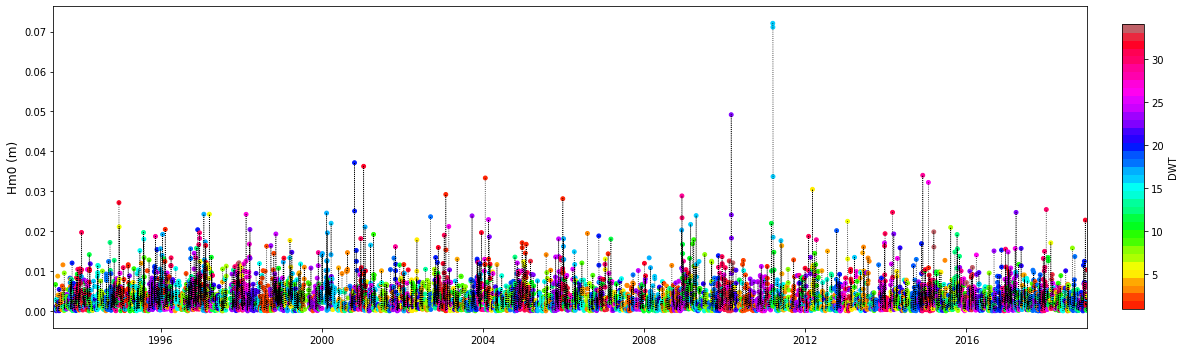

In [7]:
fig = plt.figure(figsize=[18,5])

gs1=gridspec.GridSpec(1,1)
ax1=fig.add_subplot(gs1[0])
ax1.plot(data.time,data.hm0,'k:',linewidth=0.8)
ax1.scatter(data.time,data.hm0,15,data.bmus+1,cmap=newcmp)
ax1.set_ylabel('Hm0 (m)',fontsize=12)
ax1.set_xlim(data.time[0],data.time[-1])
gs1.tight_layout(fig, rect=[0.05, [], 0.90, []])
gs2=gridspec.GridSpec(1,1)
ax1=fig.add_subplot(gs2[0])
plt.colorbar(cs,cax=ax1)
ax1.set_ylabel('DWT')
gs2.tight_layout(fig, rect=[0.91, 0.1, 0.97, 0.95])

In [8]:
mean_hm0=np.full([len(np.unique(data.bmus))],np.nan)
perc_hm0=np.full([len(np.unique(data.bmus))],np.nan)
max_hm0=np.full([len(np.unique(data.bmus))],np.nan)
for a in range(len(np.unique(data.bmus))):
    mean_hm0[a]=np.nanmean(data.hm0[np.where(data.bmus==a)[0]])
    max_hm0[a]=np.nanmax(data.hm0[np.where(data.bmus==a)[0]])
    perc_hm0[a]=np.nanpercentile(data.hm0[np.where(data.bmus==a)[0]],95)

In [9]:
perc_hm0

array([0.01555193, 0.00925308, 0.01032217, 0.01006754, 0.00995   ,
       0.01445287, 0.00933322, 0.0074378 , 0.00683445, 0.00955801,
       0.00999006, 0.0099687 , 0.01385936, 0.0070688 , 0.00790114,
       0.00855845, 0.01233421, 0.01417213, 0.00908404, 0.00785685,
       0.0124462 , 0.00722825, 0.0089501 , 0.0133289 , 0.00809562,
       0.01033138, 0.00899862, 0.01011665, 0.01325525, 0.00996655,
       0.01286814, 0.01101752, 0.01324254, 0.01191695, 0.00827721,
       0.01543014])

In [10]:
def Plot_Hm0(var,newcmp):
    x=np.reshape(var,[6,6]); x=np.flipud(np.rot90((x.T)))
    x1=np.full([np.shape(x)[0], np.shape(x)[1]+1],np.nan)
    x1[:,:-1]=x; x1[:,-1]=x[:,-1]
    fig = plt.figure(figsize=[14.5,9.5])
    gs2=gridspec.GridSpec(1,1)
    ax2=fig.add_subplot(gs2[0])
    cs=ax2.pcolormesh((np.arange(1,8)),np.flip(np.arange(1,8)),x1,vmin=np.nanmin(x1)*0.9, vmax=np.nanmax(x1)*1.1,cmap='gnuplot2_r')
    ax2.set_yticks([]); ax2.set_xticks([])
    X,Y=np.meshgrid(np.arange(1,7),np.flip(np.arange(1,7)))
    X=X.T; Y=Y.T
    X=np.flipud(np.rot90((X))); Y=np.flipud(np.rot90((Y)))
    cs1=plt.scatter(X.flatten()+0.5,Y.flatten()+0.5,120,np.arange(0,36,1)+1,cmap=newcmp)
    c=plt.colorbar(cs1,pad=-0.02)
    c.set_label('DWT',fontsize=16)
    c1=plt.colorbar(cs,pad=0.05)
    c1.set_label('Hm0 (m)',fontsize=16)

Text(0.5, 1.0, 'Mean')

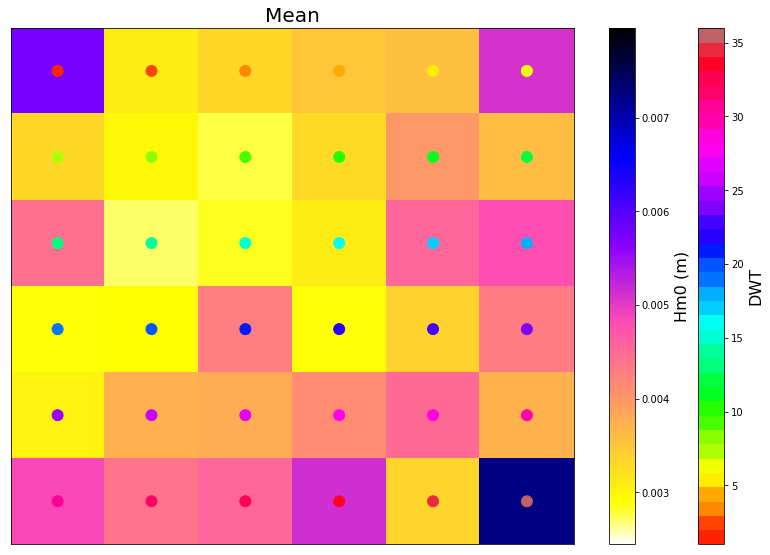

In [11]:
Plot_Hm0(mean_hm0,newcmp)
plt.title('Mean', fontsize=20)

Text(0.5, 1.0, '95% Percentile')

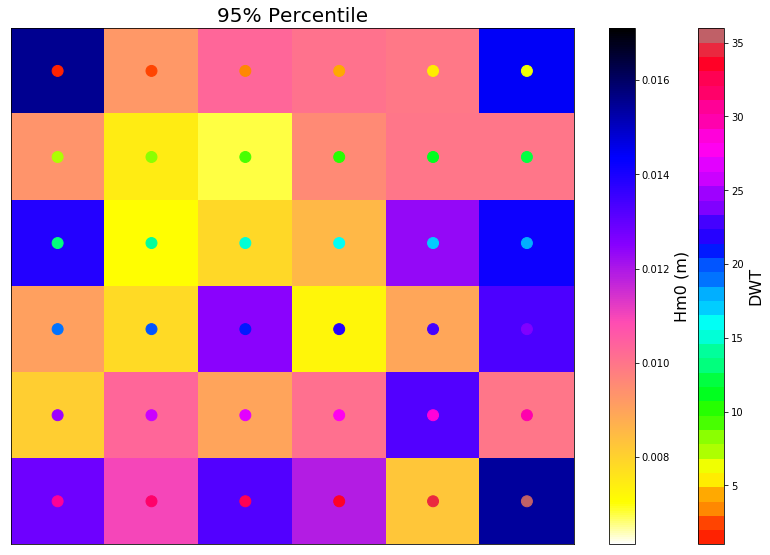

In [12]:
Plot_Hm0(perc_hm0,newcmp)
plt.title('95% Percentile', fontsize=20)

Text(0.5, 1.0, 'Maximum')

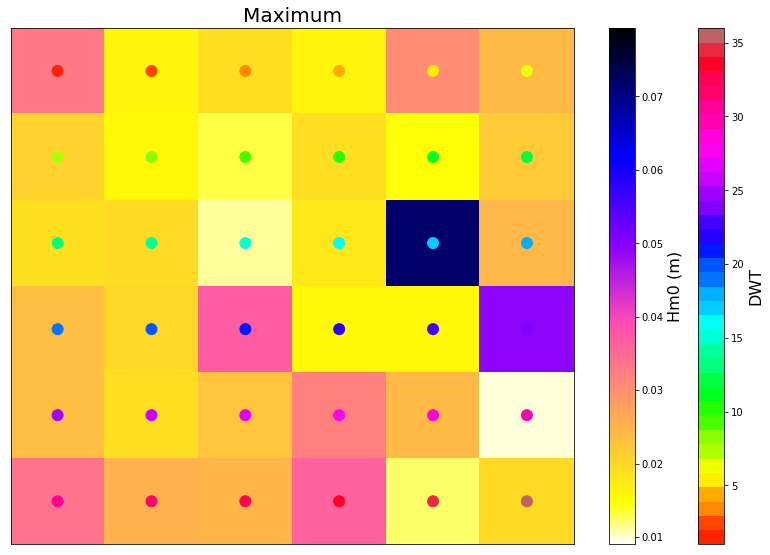

In [13]:
Plot_Hm0(max_hm0,newcmp)
plt.title('Maximum', fontsize=20)

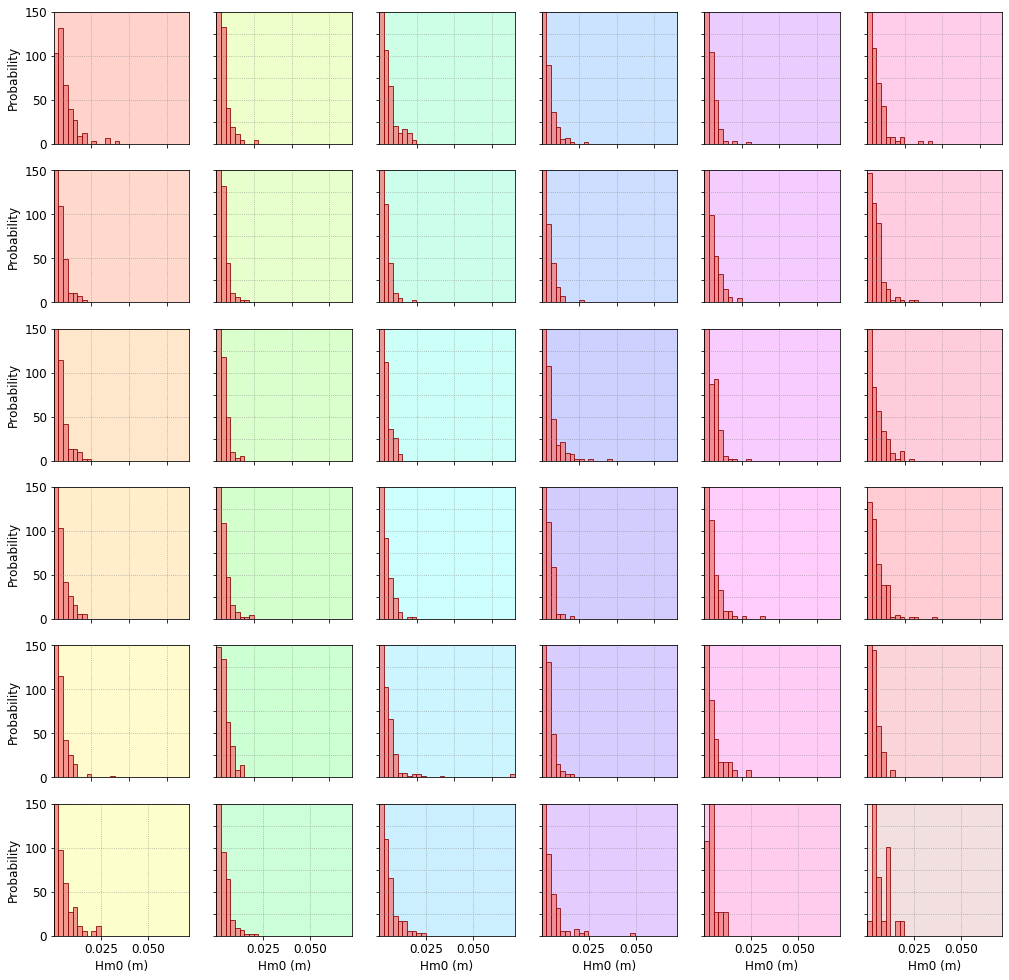

In [14]:
fig = plt.figure(figsize=[17,17])
order=[0,6,12,18,24,30,1,7,13,19,25,31,2,8,14,20,26,32,3,9,15,21,27,33,4,10,16,22,28,34,5,11,17,23,29,35]
lim=150
gs1=gridspec.GridSpec(6,6)
label='Hm0 (m)'
for a in range(len(np.unique(data.bmus))):
    ax=fig.add_subplot(gs1[order[a]],alpha=0.1, facecolor=l_colors_dwt[a,:])
    ax.patch.set_alpha(0.2)
    ax.set_xlim(np.nanmin(data.hm0),np.nanmax(data.hm0))
    ax.set_ylim(0,lim)
    ax.grid(True,color='grey',linestyle=':',alpha=0.7)
#     ax.text(np.nanmin(data.hm0)+(np.nanmax(data.hm0)-np.nanmin(data.hm0))/9,0.85*lim,'DWT'+str(a+1),fontsize=11,fontweight='bold')
    if order[a]>=30:
        ax.set_xlabel(label,fontsize=12)
        ax.xaxis.set_tick_params(labelsize=12)
    else:
        ax.set_xticklabels([])
    if (order[a]==0) | (order[a]==6) | (order[a]==12) | (order[a]==18) | (order[a]==24) | (order[a]==30):
        ax.set_ylabel('Probability',fontsize=12)
        ax.yaxis.set_tick_params(labelsize=12)
    else:
        ax.set_yticklabels([])
    ax.hist(data.hm0[np.where(data.bmus==a)[0]],density=True, bins=np.linspace(np.nanmin(data.hm0),np.nanmax(data.hm0),30), alpha=0.8, color='lightcoral', ec='darkred')